### Car Advertisement EDA

I am conducting exploratory data analysis on a car advertisement data set.

My goal is to clean and interpret the data into charts.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#loading dataset and fixing datetime
cars_df = pd.read_csv('../vehicles_us.csv',  parse_dates=['date_posted'])

In [3]:
#general information
display(cars_df.head())
display(cars_df.info())
display(cars_df.describe())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


None

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.00000
std,10040.803015,6.282065,1.660360,65094.611341,0.0,NaN,28.20427


### *Here we can see missing values already displayed with printing the first five lines. As well as, missing values shown using the info() method in the following columns:*

 - model year
 - cylinders
 - odometer
 - paint_color
 - is_4wd

In [4]:
cars_df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Half of the values in 4 wheel drive column are missing a vast majority. I would assume those cars aren't 4 wheel drive but not jumping to conclusions we cant say for sure.

# Fixing/Cleaning Data

In [5]:
#fill missing values in 'model_year' with the median of the corresponding 'model'
cars_df['model_year'] = cars_df['model_year'].fillna(
    cars_df.groupby('model')['model_year'].transform('median'))

#calculate the median cylinders by model and fill missing values
cars_df['cylinders'] = cars_df['cylinders'].fillna(
    cars_df.groupby('model')['cylinders'].transform('median'))

#fill missing odometer values with the median odometer reading by model year
cars_df['odometer'] = cars_df['odometer'].fillna(
    cars_df.groupby('model_year')['odometer'].transform('median'))

#fill remaining missing values in odometer with the overall median
cars_df['odometer'] = cars_df['odometer'].fillna(cars_df['odometer'].median())

#filling missing values in 'paint_color' column
cars_df['paint_color'] = cars_df['paint_color'].fillna('unknown')

#filling the rest of missing values with 0 - 'is_4wd'
cars_df['is_4wd'] = cars_df['is_4wd'].fillna(0)

In [6]:
#checking if all NaNs are gone
display(cars_df.isna().sum())
cars_df.head()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


#### *We can see incorrect data types*
- Model year comes our yearly - no point in float number here.
- typical vehicle has 4,6 or, 8 cylinders they cannot have .5 cylinders - no point in float.
- vehicles do not show float numbers in the odometer only whole numbers - no point in float.
- 'is_4wd' 1 symbolizing is four wheel drive - switching to int for simplicity.


### Changing Data Types

In [7]:
#model year to int
cars_df['model_year'] = cars_df['model_year'].astype('int')

#cylinders to int
cars_df['cylinders'] = cars_df['cylinders'].astype('int')

#odometer to int
cars_df['odometer'] = cars_df['odometer'].astype('int')

#4wd to int for simplicity
cars_df['is_4wd'] = cars_df['is_4wd'].astype('int')

In [8]:
#checking to make sure data is correct
display(cars_df.head(10))
display(cars_df.info())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


None

In [9]:
#saving cleaned csv file
cars_df.to_csv('../refined_vehicles_us.csv', index=False)

# Plotting 

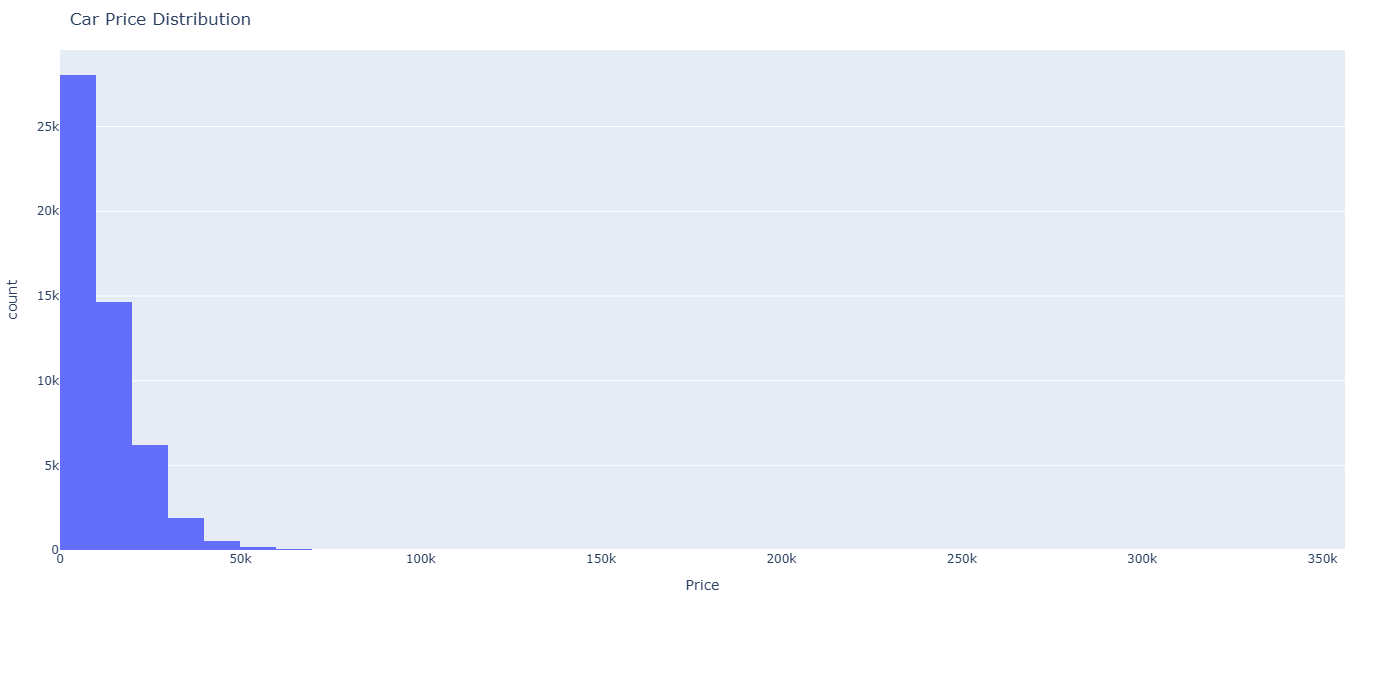

In [18]:
#Histogram for car prices without the slider
fig_hist = px.histogram(cars_df, x='price', nbins=40, title='Car Price Distribution', 
                         range_x=[0, cars_df['price'].max() * 0.95])  #Adjusted price range

#Update layout to remove slider and ensure the plot appears solid
fig_hist.update_layout(
    height=700,  #Make the plot taller by increasing height
    xaxis_title="Price",  #Add x-axis label for clarity
    margin=dict(t=50, b=150, l=50, r=50)  #Adjust margins to prevent overlap
)

fig_hist.show()


The car price distribution histogram reveals the frequency of car listings across different price ranges in the dataset. With the majority of prices concentrated in lower ranges, this indicates that most cars are listed at more affordable prices, while higher price ranges show fewer listings. This suggests a skewed distribution, where most cars are priced lower, and only a small portion of listings are in the higher price bracket. The plot provides valuable insights into the overall pricing trends within the dataset.

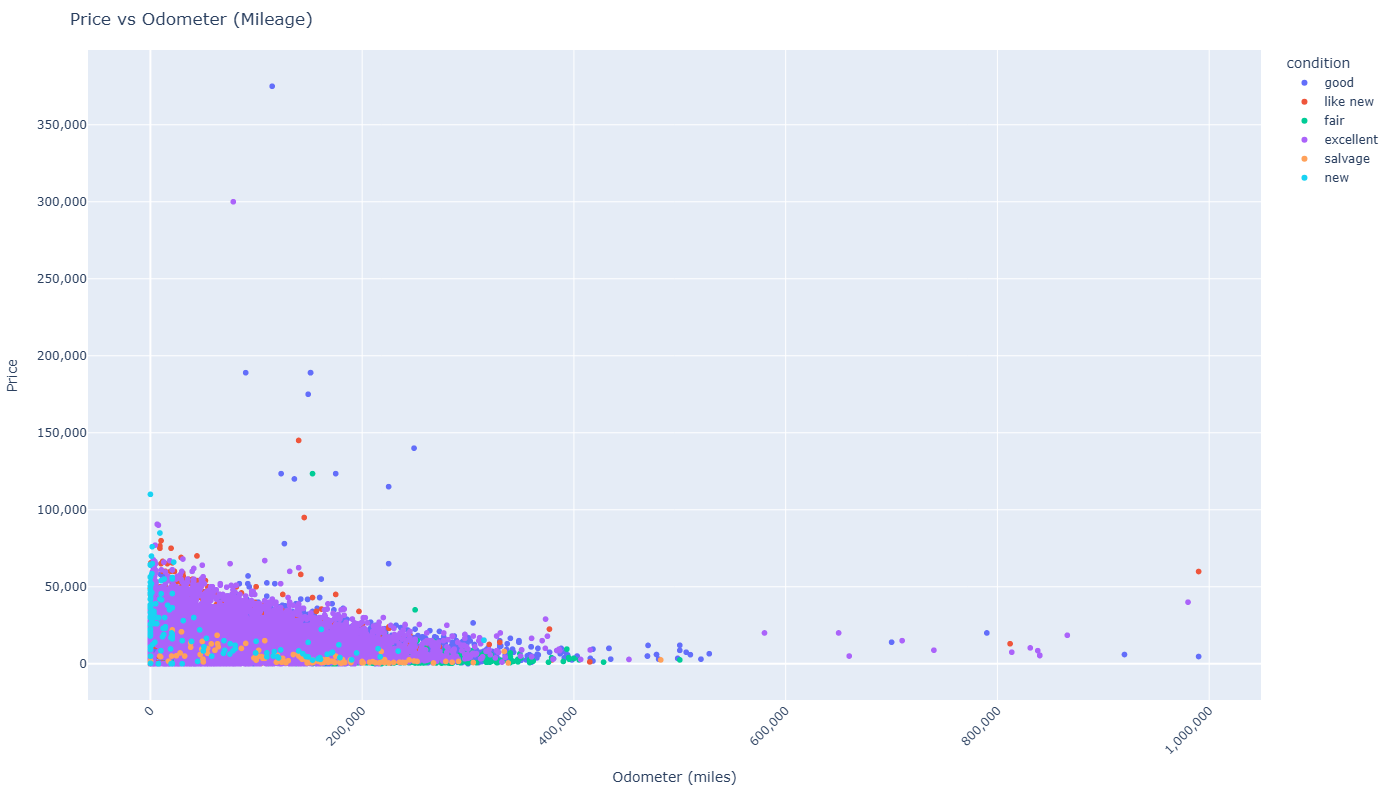

In [20]:
#Scatter plot for price vs odometer with color based on condition
fig_scatter = px.scatter(cars_df, x='odometer', y='price', color='condition', 
                         title='Price vs Odometer (Mileage)', 
                         labels={'odometer': 'Odometer (miles)', 'price': 'Price'})

#Update layout to make the plot taller and adjust the x-axis labels
fig_scatter.update_layout(
    height=800,  #Make the plot taller by increasing height
    margin={"l": 50, "r": 50, "b": 100, "t": 50},  #Adjust margins to avoid label overlap
    xaxis_tickangle=-45  #Rotate the x-axis labels to avoid overlap
)

#Update the x and y axis labels to include commas for readability
fig_scatter.update_layout(
    xaxis=dict(
        tickformat=',',  #Use commas as thousand separators
        title='Odometer (miles)'
    ),
    yaxis=dict(
        tickformat=',',  #Use commas as thousand separators
        title='Price'
    )
)

#Show the plot
fig_scatter.show()


The scatter plot of price versus odometer (mileage) with color coding based on car condition highlights the relationship between a vehicle's mileage and its price. Generally, higher-mileage cars tend to have lower prices, though exceptions exist, particularly with cars in better condition. This visualization provides insight into how both mileage and condition influence the pricing of cars in the dataset.